In [35]:
import os 
import numpy as np
import matplotlib.pyplot as plt


# Question-1

In [36]:
x = [2,3,5,8,12]
y = [10,15,25,40,60]

In [37]:
def LagrangeInterpolation(x_list,y_list,x_in):
    n = len(x_list)
    y_pred = 0 
    for i in range(n):
        prod_k = 1.0
        for k in range(n):
            if i != k :
                prod_k *=  (x_in-x_list[k])/(x_list[i]-x_list[k])
        y_pred += y_list[i] * prod_k
    return y_pred
        

In [38]:
LagrangeInterpolation(x,y, 6.7)

33.5

# Question-2 

In [39]:
x = [2.5 , 3.5 , 5.0, 6.0,  7.5 , 10.0 , 12.5, 15.0, 17.5, 20.5]
y = [13.0 , 11.0 , 8.5 , 8.2  , 7.0 , 6.2, 5.2, 4.8 ,4.6 ,4.3]

In [40]:
def LinearSquareFit(x_list,y_list,sigma_i = None):
    " y = a1 + a2x"
    a = 0.0
    b =  0.0
    n = len(x_list)
    if sigma_i == None:
        sigma_i = []
        for i in range(n):
            sigma_i.append(1.0)
    S = sum([1.0/sigma_i[i]**2 for i in range(n)])
    S_xx = sum([x_list[i]**2/sigma_i[i]**2 for i in range(n)])
    S_yy = sum([y_list[i]**2/sigma_i[i]**2 for i in range(n)])
    S_x = sum([x_list[i]/sigma_i[i]**2 for i in range(n)])
    S_y = sum([y_list[i]/sigma_i[i]**2 for i in range(n)])
    S_xy = sum([x_list[i]*y_list[i]/sigma_i[i]**2 for i in range(n)])
    Delta = S*S_xx - S_x**2
    a1 = (S_xx*S_y-S_x*S_xy)/Delta 
    a2 = (S_xy*S-S_x*S_y)/Delta
    r_square =S_xy**2 / ( S_xx * S_yy )
    return a1, a2 ,  r_square


In [41]:
# part-1 y= axb , log f (x) = log a + b log x;
y_list = [np.log(y[i]) for i in range(len(x))]
x_list = [np.log(x[i]) for i in range(len(x))]
a1 , a2 ,r1_square = LinearSquareFit(x_list,y_list)
a_1 = np.exp(a1)
b_1 = a2

In [42]:
# part-1 y= ae^bx  , log f (x) = log a + bx;
y_list = [np.log(y[i]) for i in range(len(x))]
x_list = x
a1 , a2 ,r2_square = LinearSquareFit(x_list,y_list)
a_2 = np.exp(a1)
b_2 = a2


In [12]:
r1_square

0.7750435352872259

In [13]:
r2_square

0.5762426888065756

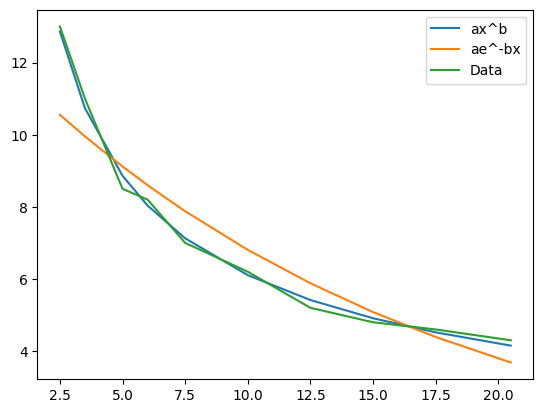

In [44]:
x_ = np.linspace(2.5,20,100)
y_1 = [a_1 * x[i]**b_1 for i in range(len(x))]
y_2 = [a_2 * np.exp(b_2* x[i]) for i in range(len(x))]
plt.plot(x,y_1, label = "ax^b")
plt.plot(x,y_2, label = "ae^-bx")
plt.plot(x,y,label = "Data")
plt.legend()
plt.show()